In [19]:
import pandas as pd

#Import data
HDNames= ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','hal','HeartDisease']
Data = pd.read_excel('/Users/saurmoha/Downloads/Ch3.ClevelandData.xlsx', names=HDNames)


print(Data.head(20))
print(Data.info())
summary = Data.describe()
print(summary)


    age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0    67    1   4       160   286    0        2      108      1      1.5   
1    67    1   4       120   229    0        2      129      1      2.6   
2    37    1   3       130   250    0        0      187      0      3.5   
3    41    0   2       130   204    0        2      172      0      1.4   
4    56    1   2       120   236    0        0      178      0      0.8   
5    62    0   4       140   268    0        2      160      0      3.6   
6    57    0   4       120   354    0        0      163      1      0.6   
7    63    1   4       130   254    0        2      147      0      1.4   
8    53    1   4       140   203    1        2      155      1      3.1   
9    57    1   4       140   192    0        0      148      0      0.4   
10   56    0   2       140   294    0        2      153      0      1.3   
11   56    1   3       130   256    1        2      142      1      0.6   
12   44    1   2       12

In [20]:

#Removing missing values
import numpy as np

DataNew = Data.replace('?', np.nan)

print(DataNew.info())

print(DataNew.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           302 non-null    int64  
 1   sex           302 non-null    int64  
 2   cp            302 non-null    int64  
 3   trestbps      302 non-null    int64  
 4   chol          302 non-null    int64  
 5   fbs           302 non-null    int64  
 6   restecg       302 non-null    int64  
 7   thalach       302 non-null    int64  
 8   exang         302 non-null    int64  
 9   oldpeak       302 non-null    float64
 10  slope         302 non-null    int64  
 11  ca            298 non-null    float64
 12  hal           300 non-null    float64
 13  HeartDisease  302 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.2 KB
None
              age         sex          cp    trestbps        chol         fbs  \
count  302.000000  302.000000  302.000000  302.000000  302.000000  30

In [21]:
#Divide DataFrame
InputNames = HDNames
InputNames.pop()
Input = pd.DataFrame(DataNew.iloc[:, 0:13],columns=InputNames)

Target = pd.DataFrame(DataNew.iloc[:, 13],columns=['HeartDisease'])



In [22]:
#Data scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
print(scaler.fit(Input))
InputScaled = scaler.fit_transform(Input)


InputScaled = pd.DataFrame(InputScaled,columns=InputNames)

summary = InputScaled.describe()
summary = summary.transpose()
print(summary)



StandardScaler()
          count          mean       std       min       25%       50%  \
age       302.0 -2.852759e-16  1.001660 -2.815521 -0.710301  0.120707   
sex       302.0  2.793939e-17  1.001660 -1.453754 -1.453754  0.687874   
cp        302.0 -1.965867e-16  1.001660 -2.274676 -0.173905 -0.173905   
trestbps  302.0  2.180007e-16  1.001660 -2.141026 -0.662326 -0.093596   
chol      302.0  1.713126e-16  1.001660 -2.332167 -0.690318 -0.101184   
fbs       302.0  2.977750e-17  1.001660 -0.412968 -0.412968 -0.412968   
restecg   302.0  3.676235e-16  1.001660 -0.993444 -0.993444 -0.490054   
thalach   302.0  1.286682e-16  1.001660 -3.436327 -0.715015  0.148373   
exang     302.0 -7.940668e-17  1.001660 -0.698344 -0.698344 -0.698344   
oldpeak   302.0  1.102871e-17  1.001660 -0.893537 -0.893537 -0.203167   
slope     302.0  2.610127e-16  1.001660 -0.975613 -0.975613  0.661249   
ca        298.0  1.479056e-16  1.001682 -0.720134 -0.720134 -0.720134   
hal       300.0 -4.810966e-17  1.0

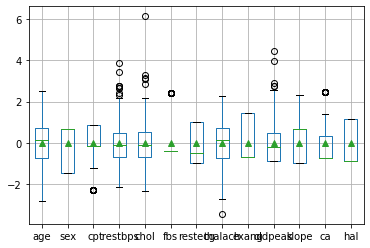

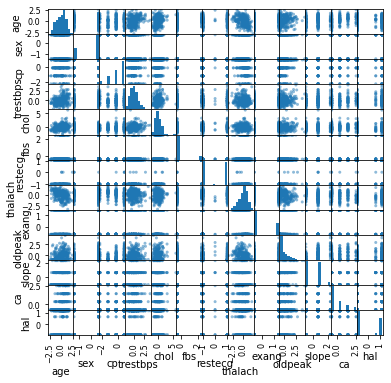

               age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.099925  0.112326  0.283257  0.210120  0.112245   
sex      -0.099925  1.000000  0.015342 -0.066292 -0.199492  0.042863   
cp        0.112326  0.015342  1.000000 -0.030717  0.070950 -0.022524   
trestbps  0.283257 -0.066292 -0.030717  1.000000  0.130924  0.171127   
chol      0.210120 -0.199492  0.070950  0.130924  1.000000  0.012058   
fbs       0.112245  0.042863 -0.022524  0.171127  0.012058  1.000000   
restecg   0.146142  0.019386  0.075854  0.144395  0.172249  0.062202   
thalach  -0.394448 -0.048740 -0.337136 -0.045437 -0.003417 -0.008067   
exang     0.094065  0.148019  0.382394  0.066627  0.060755  0.031514   
oldpeak   0.201083  0.099976  0.212589  0.186987  0.047617 -0.002907   
slope     0.156199  0.032671  0.171926  0.112752 -0.002085  0.042630   
ca        0.365732  0.095014  0.229952  0.100775  0.118462  0.152906   
hal       0.125607  0.380012  0.272629  0.132131  0.014813  0.06

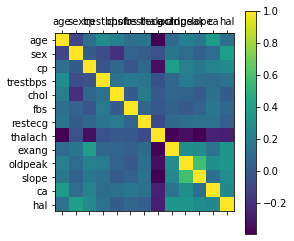

In [23]:

#Data visualitation
#DataScaled = pd.concat([InputScaled, Target], axis=1)

import matplotlib.pyplot as plt
boxplot = InputScaled.boxplot(column=InputNames,showmeans=True)
plt.show()

pd.plotting.scatter_matrix(InputScaled, figsize=(6, 6))
plt.show()

CorData = InputScaled.corr(method='pearson')

with pd.option_context('display.max_rows', None, 'display.max_columns', CorData.shape[1]):
    print(CorData)

plt.matshow(CorData)
plt.xticks(range(len(CorData.columns)), CorData.columns)
plt.yticks(range(len(CorData.columns)), CorData.columns)
plt.colorbar()
plt.show()



In [24]:
#Split the data
from sklearn.model_selection import train_test_split

Input_train, Input_test, Target_train, Target_test = train_test_split(InputScaled, Target, test_size = 0.30, random_state = 5)
print(Input_train.shape)
print(Input_test.shape)
print(Target_train.shape)
print(Target_test.shape)



(211, 13)
(91, 13)
(211, 1)
(91, 1)


In [25]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(30, input_dim=13, activation='tanh'))
model.add(Dense(20, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(Input_train, Target_train, epochs=1000, verbose=1)

model.summary()

score = model.evaluate(Input_test, Target_test, verbose=0)

print('Keras Model Accuracy = ',score[1])

Target_Classification = model.predict(Input_test)
Target_Classification = (Target_Classification > 0.5)



from sklearn.metrics import confusion_matrix

print(confusion_matrix(Target_test, Target_Classification))

Epoch 1/1000
7/7 [==============================] - 0s 779us/step - loss: nan - accuracy: 0.4447
Epoch 2/1000
7/7 [==============================] - 0s 893us/step - loss: nan - accuracy: 0.5166
Epoch 3/1000
7/7 [==============================] - 0s 903us/step - loss: nan - accuracy: 0.5443
Epoch 4/1000
7/7 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.5297
Epoch 5/1000
7/7 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.5092
Epoch 6/1000
7/7 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.5188
Epoch 7/1000
7/7 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.5387
Epoch 8/1000
7/7 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.5172
Epoch 9/1000
7/7 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.5010
Epoch 10/1000
7/7 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.5304
Epoch 11/1000
7/7 [========================